In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [62]:
def compare_statistics(a1, a2):
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print('%14s %14s %14s' % ('statistic', 'normal', 'log normal'))
    print('-' * 45)
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 8));
    sns.distplot(a1, bins=None, kde=False, norm_hist=False, ax=ax1);
    sns.distplot(a2, bins=None, kde=False, norm_hist=False, ax=ax2, color='orange');

     statistic         normal     log normal
---------------------------------------------
          size      10000.000      10000.000
           min         85.925         84.204
           max        143.756        145.248
          mean        110.418        110.462
           std          7.873          7.874
          skew          0.222          0.170
      kurtosis          0.031         -0.060


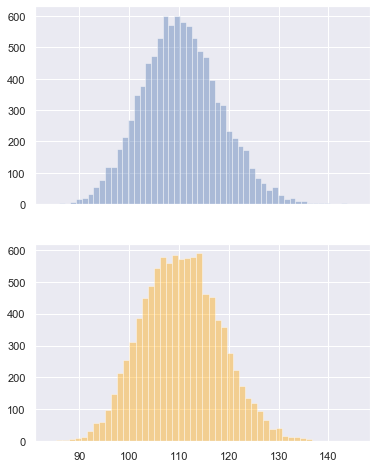

In [63]:
S0 = 100  # initial value
r = 0.05  # constant short rate
sigma = 0.05  # constant volatility
T = 2  # in years
I = 10000  # number of random draws
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * npr.standard_normal(I))
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T, sigma * np.sqrt(T), size=I)

compare_statistics(ST1, ST2)

In [64]:
import plotly.graph_objects as go

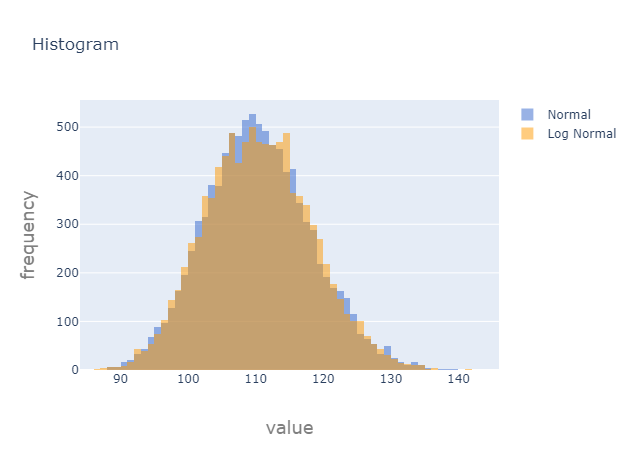

In [89]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=ST1, 
#                            nbinsx=70, 
                           name='Normal',
                           marker_color='#3366cc',
#                            opacity=0.5,
                          ))
fig.add_trace(go.Histogram(x=ST2, 
#                            nbinsx=70, 
                           name='Log Normal',
                           marker_color='#ff9900',
#                            opacity=0.5,
                          ))

# Overlay both histograms
fig.update_layout(
    barmode='overlay', 
    title=go.layout.Title(text='Histogram'),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="value",
            font=dict(
#                 family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="frequency",
            font=dict(
#                 family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.5, nbinsx=50,
                  xbins=dict( # bins used for histogram
                      start=0,
                      end=200,
                      size=1
                  ),
                 )
fig.show()